<a href="https://colab.research.google.com/github/seenu384/CognoRise-InfoTech-/blob/main/CognoRise1_Diabetics_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report

**LOADING DATASET**

In [ ]:
df=pd.read_csv('/content/diabetes_prediction_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
df.shape

(100000, 9)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


**DATA PREPROCESSING**

In [ ]:
#missing values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [ ]:
#changing categorical to numerical
lb=LabelEncoder()
df['gender']=lb.fit_transform(df['gender'])
df['smoking_history']=lb.fit_transform(df['smoking_history'])

**DATA VISUALIZATION**

<Axes: >

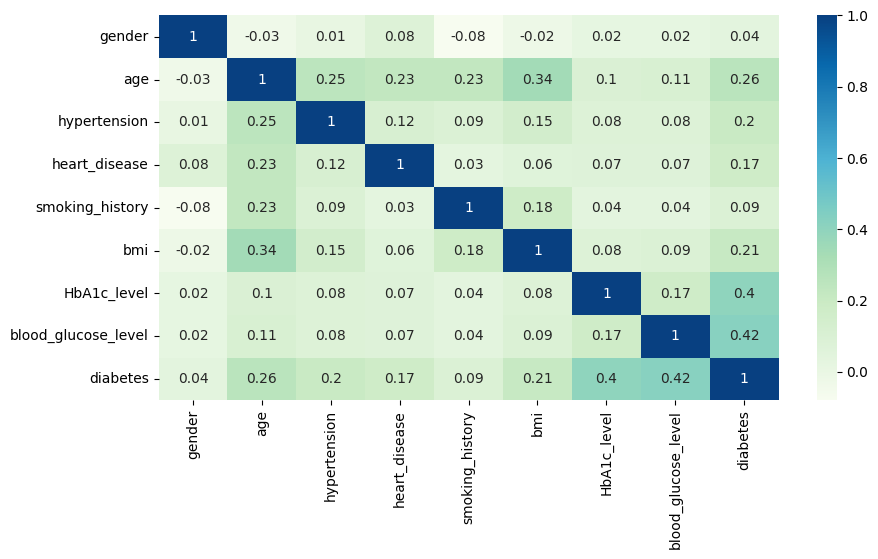

In [ ]:
plt.figure(figsize=(10,5))
correlation=df.corr(method='pearson',min_periods=1,numeric_only=True).round(2)
sns.heatmap(correlation,annot=True,cmap='GnBu')

**1.BALANCED OR IMBALANCED?**

<Axes: xlabel='diabetes', ylabel='count'>

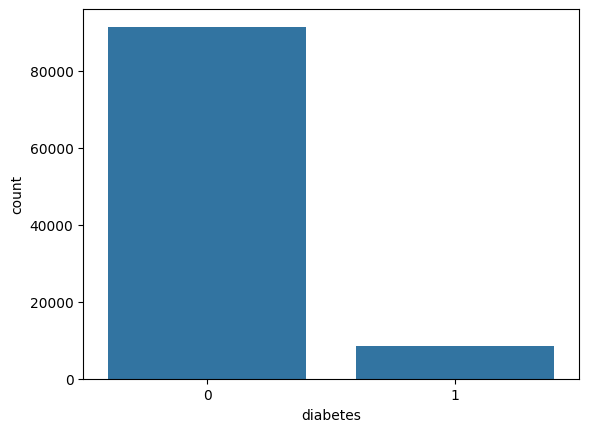

In [ ]:
sns.countplot(x='diabetes',data=df)

**2.CONVERTING TO A BALANCED DATA**

In [ ]:
sm=SMOTE()
x_sm=df.iloc[:,:-1]
y_sm=df.iloc[:,-1]
x1,y1=sm.fit_resample(x_sm,y_sm)
y1.value_counts()

diabetes
0    91500
1    91500
Name: count, dtype: int64

In [ ]:
x=x1.values
y=y1.values

**SPLITTING INTO TRAINING AND TESTING DATA**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[  0.        ,  73.24275607,   0.        , ...,  30.89037988,
          8.42717318, 280.        ],
       [  0.        ,  55.87134975,   0.        , ...,  43.75355941,
          7.08303054, 280.        ],
       [  1.        ,  18.        ,   0.        , ...,  24.5       ,
          6.6       , 130.        ],
       ...,
       [  0.        ,  31.        ,   0.        , ...,  37.17688791,
          6.99831086, 240.        ],
       [  0.        ,  58.00958548,   0.        , ...,  42.33658288,
          6.00958548, 160.        ],
       [  1.        ,  69.2606648 ,   0.        , ...,  27.32      ,
          9.        , 160.        ]])

In [ ]:
y_train

array([1, 1, 0, ..., 1, 1, 1])

**NORMALIZATION**

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

**MODEL CREATION**


**1.RANDOM FOREST**

In [ ]:
RF=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=42)
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 1, 1])

Confusion Matrix is: [[25548  1821]
 [  824 26707]]
Score is 0.9518214936247723
Classification Report is               precision    recall  f1-score   support

           0       0.97      0.93      0.95     27369
           1       0.94      0.97      0.95     27531

    accuracy                           0.95     54900
   macro avg       0.95      0.95      0.95     54900
weighted avg       0.95      0.95      0.95     54900



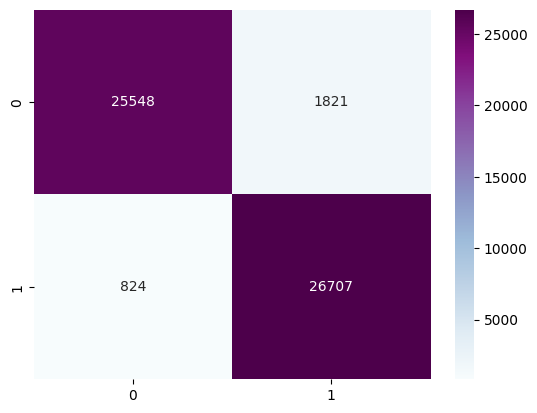

In [ ]:
print("Confusion Matrix is:",confusion_matrix(y_test,y_pred))
print("Score is",accuracy_score(y_test,y_pred))
labels=['1','0']
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='g',cmap='BuPu')
print("Classification Report is",classification_report(y_test,y_pred))

**2.KNN**

In [ ]:
KNN=KNeighborsClassifier(n_neighbors=9)
KNN.fit(x_train,y_train)
y_pred1=KNN.predict(x_test)
y_pred1

array([1, 0, 0, ..., 0, 1, 0])

Confusion Matrix is: [[24601  2768]
 [ 1398 26133]]
Score is 0.9241165755919855
Classification Report is:               precision    recall  f1-score   support

           0       0.95      0.90      0.92     27369
           1       0.90      0.95      0.93     27531

    accuracy                           0.92     54900
   macro avg       0.93      0.92      0.92     54900
weighted avg       0.93      0.92      0.92     54900



<Axes: >

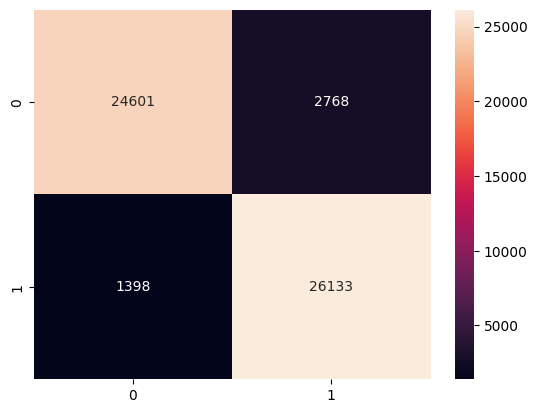

In [ ]:
print("Confusion Matrix is:",confusion_matrix(y_test,y_pred1))
print("Score is",accuracy_score(y_test,y_pred1))
print("Classification Report is:",classification_report(y_test,y_pred1))
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,fmt='g',cmap='rocket')

**3.ADABOOSTING CLASSIFIER**

In [ ]:
abc=AdaBoostClassifier(n_estimators=100,learning_rate=1,random_state=42)
abc.fit(x_train,y_train)
y_pred2=abc.predict(x_test)
y_pred2
print("Accuracy :",accuracy_score(y_test,y_pred2))

Accuracy : 0.8702914389799635
